## Input Image

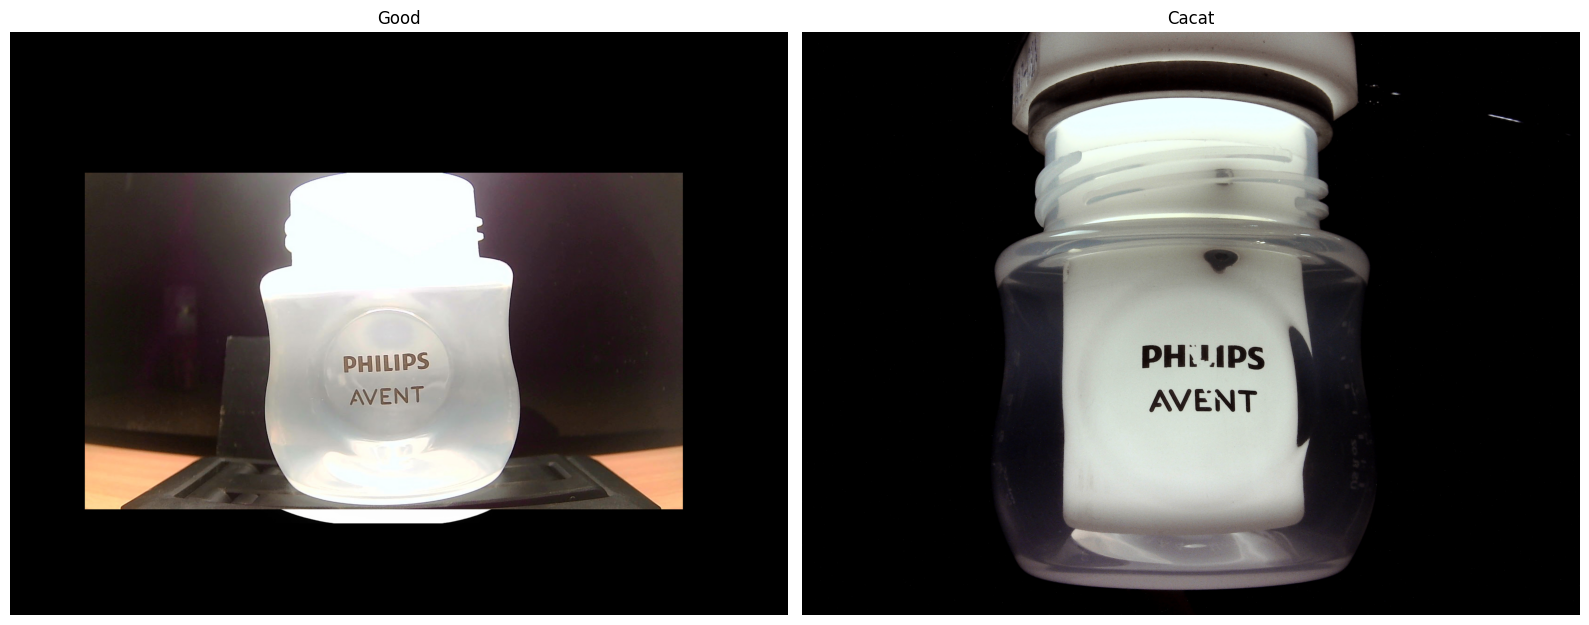

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

image1 = Image.open(r"file_image\test.jpg")
image2 = Image.open(r"Sebagian Dataset yang Digunakan\reject\REJECT_AVENT20230728113951796247.jpg")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Pre-Processing Citra input

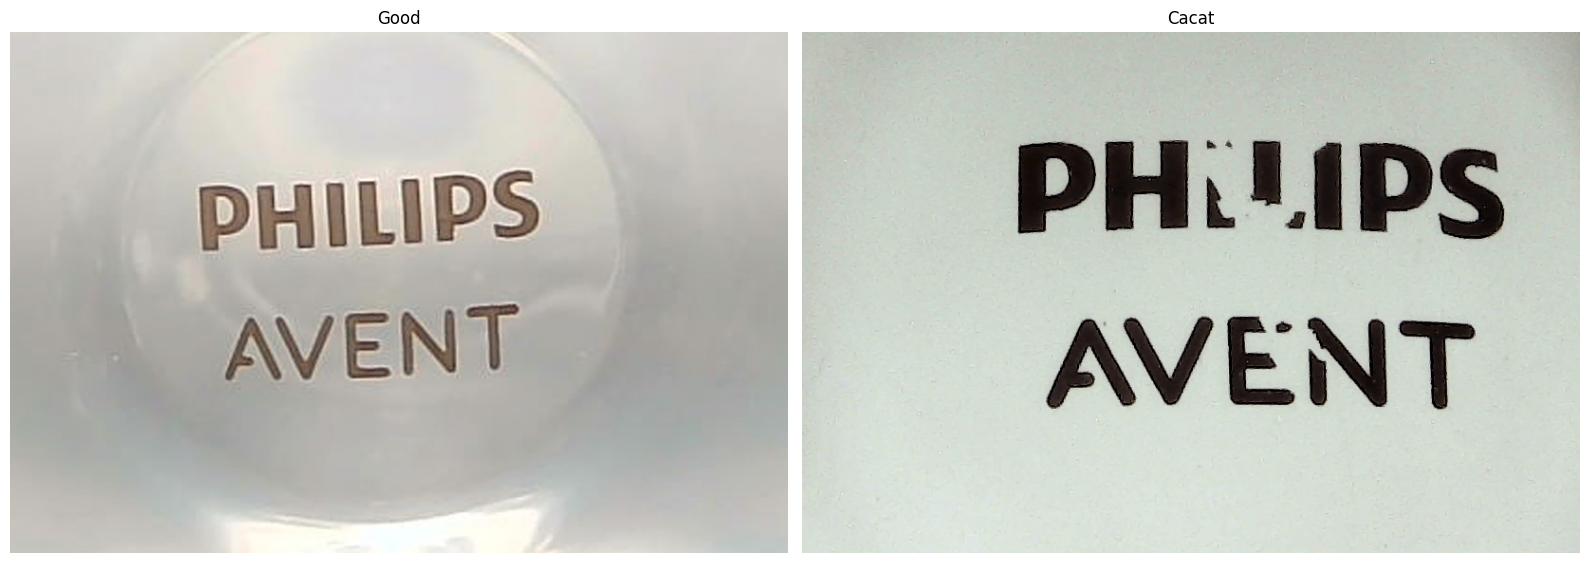

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

left1, upper1, right1, lower1 = 1200, 1200, 2020, 1750
cropped_image1 = image1.crop((left1, upper1, right1, lower1))

left2, upper2, right2, lower2 = 1200, 1200, 2020, 1750
cropped_image2 = image2.crop((left2, upper2, right2, lower2))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(cropped_image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(cropped_image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

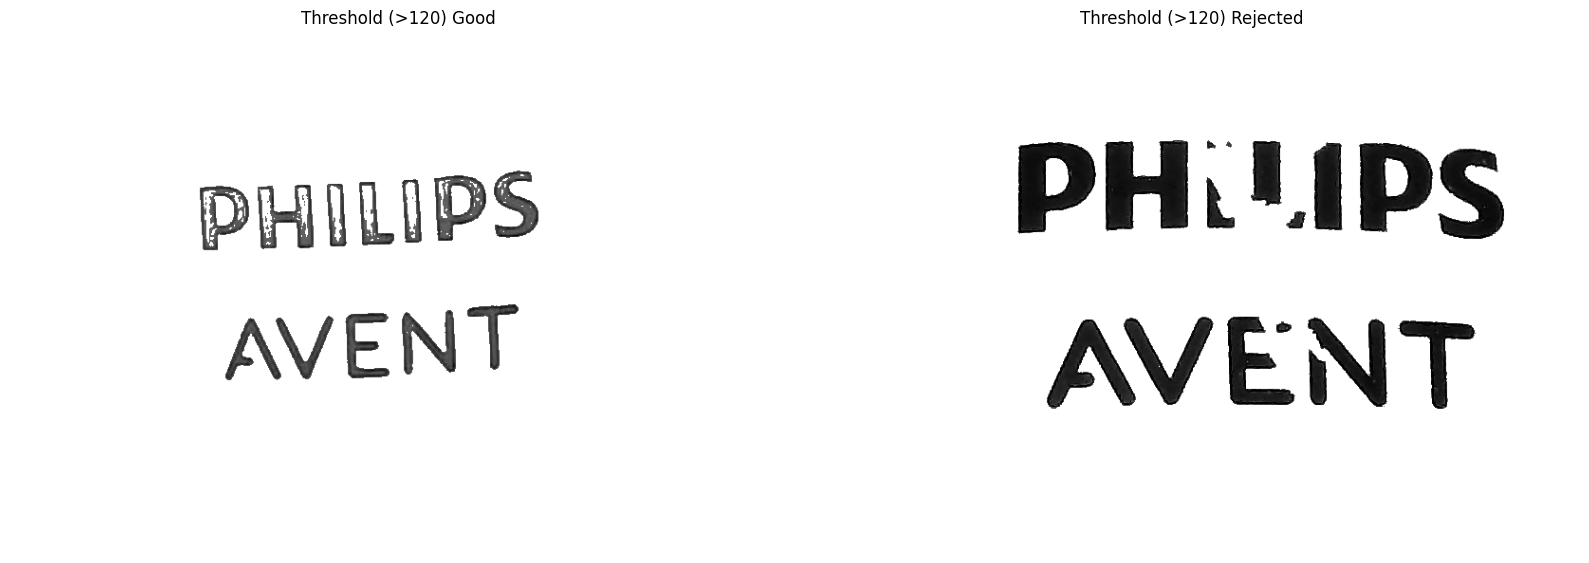

In [12]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image1_th1 = cv2.cvtColor(np.array(cropped_image1), cv2.COLOR_RGB2GRAY)
image2_th2 = cv2.cvtColor(np.array(cropped_image2), cv2.COLOR_RGB2GRAY)

threshold_value = 120
image1_th1[image1_th1 > threshold_value] = 255
image2_th2[image2_th2 > threshold_value] = 255

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(image1_th1, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Threshold (>120) Good")

axes[1].imshow(image2_th2, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Threshold (>120) Rejected")

plt.tight_layout()
plt.show()

In [13]:
import cv2
import numpy as np
from PIL import Image

def process_image(image_path):
    image = Image.open(image_path)

    # Langkah 1: Potong gambar
    crop_coordinates = (1200, 1200, 2020, 1750)
    left, upper, right, lower = crop_coordinates
    cropped_image = image.crop((left, upper, right, lower))

    # Langkah 2: Konversi ke grayscale
    gray_image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2GRAY)

    # Langkah 3: Thresholding
    thresholded_image = gray_image.copy()
    threshold_value = 120
    thresholded_image[gray_image > threshold_value] = 255

    #plt.imshow(thresholded_image, cmap='gray') 
    #plt.axis('off')
    #plt.show()

    return thresholded_image

# Contoh pemanggilan fungsi
image_path = r"Sebagian Dataset yang Digunakan\reject\REJECT_AVENT20230728113951796247.jpg"
result_image = process_image(image_path)

## Model 1

In [14]:
import joblib
import numpy as np
from sklearn.decomposition import PCA

def model_1(image):
    pca_model_1 = r'C:\Users\irham\Desktop\Code Philip MF\model\pca_model_1.pkl'
    classifier_model_1 = r'C:\Users\irham\Desktop\Code Philip MF\model\model_1_RF.h5'
    
    pca = joblib.load(pca_model_1)
    rf_classifier = joblib.load(classifier_model_1)
    
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    X = hist[20:100]
    X = X.reshape(1, -1)
    
    X_transformed = pca.transform(X)
    
    X_transformed_subset = X_transformed[:, 0:3]
    predictions = rf_classifier.predict(X_transformed_subset)

    if predictions == [0]:
        kesimpulan = 'No'
    else :
        kesimpulan = "Yes"

    return kesimpulan

model_1(result_image)

C:\Users\irham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\irham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\irham\AppData\Local\Packages\PythonSof

'Yes'

## Model 2

In [15]:
import joblib
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def calculate_glcm_properties(image):
    distances = [1]
    
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm_properties = []
    glcm_energies = []
    glcm_homogeneities = []

    for angle in angles:
        glcm = graycomatrix(image, distances=distances, angles=[angle], symmetric=True, normed=True)
        
        energy = graycoprops(glcm, 'energy')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        glcm_energies.append(energy)
        glcm_homogeneities.append(homogeneity)

    return glcm_energies, glcm_homogeneities


def model_2(image):
    pca_model_2 = r'C:\Users\irham\Desktop\Code Philip MF\model\pca_model_2.pkl'
    classifier_model_2 = r'C:\Users\irham\Desktop\Code Philip MF\model\model_2_RF.h5'
    
    pca = joblib.load(pca_model_2)
    rf_classifier = joblib.load(classifier_model_2)
    
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    X = hist[0:50]
    
    energy_values, homogeneity_values = calculate_glcm_properties(image)
    
    #print(X)
    #print(energy_values)
    #print(homogeneity_values)

    combined_data = np.hstack((energy_values, homogeneity_values, X))

    X = combined_data.reshape(1, -1)
    X_gabungan = pca.transform(X)        
    X_gabungan = X_gabungan[:, 0:4]
    
    predictions = rf_classifier.predict(X_gabungan)

    if predictions == [0]:
        kesimpulan = 'No'
    else :
        kesimpulan = "Yes"

    return kesimpulan

image_path = r"C:\Users\irham\Desktop\Code Philip MF\Sebagian Dataset yang Digunakan\reject\REJECT_AVENT20230728113951796247.jpg"
result_image = process_image(image_path)

model_2(result_image)

C:\Users\irham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\irham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


'Yes'

## Model 3

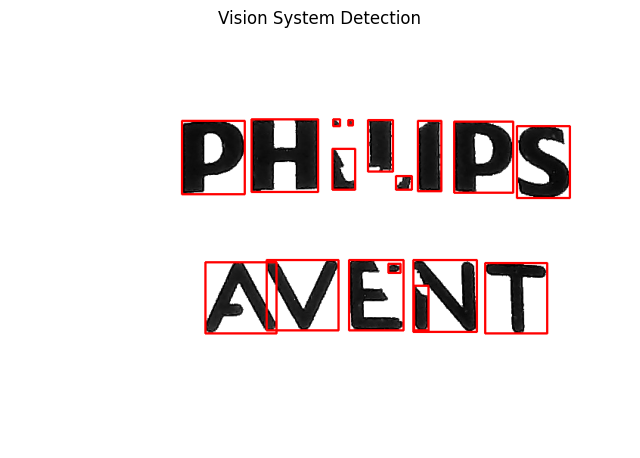

17

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def model_3(image_asli):
    image = np.copy(image_asli)
    image[image == 255] = 0
    
    num_objects = 0
    
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    corner_coordinates = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        x2, y2 = x + w, y + h
        
        contour_area = cv2.contourArea(contour)
        
        min_contour_area = 1
        if contour_area >= min_contour_area:
            corner_coordinates.append(((x, y), (x2, y2)))
            
    if corner_coordinates:
        image_with_boxes = cv2.cvtColor(image_asli, cv2.COLOR_GRAY2BGR)
        for i, ((x, y), (x2, y2)) in enumerate(corner_coordinates, start=1):
            cv2.rectangle(image_with_boxes, (x, y), (x2, y2), (0, 0, 255), 2)
        
        num_objects = len(corner_coordinates)

        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Vision System Detection')
        plt.axis('off')
        plt.show()
    else:
        print("No objects were found in the image.")

    return num_objects

model_3(result_image)

# Gabungan Semua Model

In [17]:
import time

def cek_botol(image_path):
    start_time = time.time()
    result_image = process_image(image_path)
    result_1 = model_1(result_image)
    result_2 = model_2(result_image)
    model3 = model_3(result_image)

    if model3 == 12 :
        result_3 = 'No'
    else:
        result_3 = 'Yes'

    if result_1 == 'Yes' or result_2 == 'Yes' or result_3 == 'Yes':
        kesimpulan = "Botol Rejected"
    else:
        kesimpulan = "Botol Good"

    waktu = time.time() - start_time

    print("    Philip Bottle Vision System     ")
    print("------------------------------------")
    print("")
    print("Objek Terdeteksi : ", model3)
    print("")
    print("Cat Pudar     : ", result_1)
    print("Print Kurang  : ", result_2)
    print("Over Printing : ", result_3)
    print("")
    print("------------------------------------")
    print("Kesimpulan : ", kesimpulan)
    print("Deteksi Selesai Dalam", "{:.2f}".format(waktu), "detik")

C:\Users\irham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\irham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\irham\AppData\Local\Packages\PythonSof

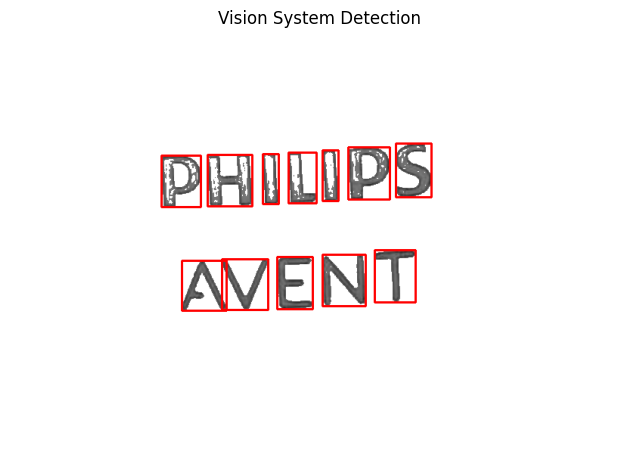

    Philip Bottle Vision System     
------------------------------------

Objek Terdeteksi :  12

Cat Pudar     :  Yes
Print Kurang  :  Yes
Over Printing :  No

------------------------------------
Kesimpulan :  Botol Rejected
Deteksi Selesai Dalam 0.27 detik


In [18]:
#image_path = r"Sebagian Dataset yang Digunakan/good/GOOD_AVENT20230728112848956624.jpg"
image_path = r"file_image/test.jpg"

cek_botol(image_path)

## Cek Semua Citra Botol

In [19]:
import os
import time
import csv

def all_check(image_path):
    start_time = time.time()

    result_image = process_image(image_path)
    result_1 = model_1(result_image)
    result_2 = model_2(result_image)
    model3 = model_3(result_image)

    if result_1 == 'No':
        result_1 = 0
    else:
        result_1 = 1

    if result_2 == 'No':
        result_2 = 0
    else:
        result_2 = 1

    if model3 == 12 and result_2 == 0:
        result_3 = 0
    else:
        result_3 = 1

    if result_1 == 1 or result_2 == 1 or result_3 == 1:
        kesimpulan = "Botol Rejected"
    else:
        kesimpulan = "Botol Good"

    waktu = time.time() - start_time
    waktu = "{:.3f}".format(waktu)

    return waktu, kesimpulan, result_1, result_2, result_3

def process_folder(input_folder, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Image Name', 'Result_1', 'Result_2', 'Result_3', 'Waktu', 'Kesimpulan'])
        
        for filename in os.listdir(input_folder):
            if filename.endswith(".jpg"):
                image_path = os.path.join(input_folder, filename)
                waktu, kesimpulan, result_1, result_2, result_3 = all_check(image_path)
                csv_writer.writerow([filename, result_1, result_2, result_3, waktu, kesimpulan])

input_folder = r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Botol ~ 14 september2023\CAMERA 1_AVENT\good"
output_csv = r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\hasil_cek_good_data 14 september.csv"

process_folder(input_folder, output_csv)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Users\\mmasa\\Downloads\\Philip Vision Checking\\Data Botol\\hasil_cek_good_data 14 september.csv'